In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)

from utils import utils
from models import FaceTranslationGANInferenceModel

from face_toolbox_keras.models.verifier.face_verifier import FaceVerifier
from face_toolbox_keras.models.parser import face_parser
from face_toolbox_keras.models.detector import face_detector
from face_toolbox_keras.models.detector.iris_detector import IrisDetector

Using TensorFlow backend.


In [3]:
fv = FaceVerifier(classes=512)
fp = face_parser.FaceParser()
fd = face_detector.FaceAlignmentDetector()
idet = IrisDetector()

model = FaceTranslationGANInferenceModel()









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Found checkpoints in weights folder. Built model with pre-trained weights.


In [41]:
fn_tgt  = "../../data/AIDetection/kdfd_real/crop/35429_132/2_0.png"
fn_src = "../../data/AIDetection/kdfd_real/crop/3545258378f2a3566e4a_005/13_0.png"

In [42]:
tgt, mask, aligned_im, (x0, y0, x1, y1), landmarks = utils.get_src_inputs(fn_tgt, fd, fp, idet)
src, emb_src = utils.get_tar_inputs(fn_src, fd, fv)

In [43]:
out = model.inference(tgt, mask, src, emb_src)
result_face = np.squeeze(((out[0] + 1) * 255 / 2).astype(np.uint8))

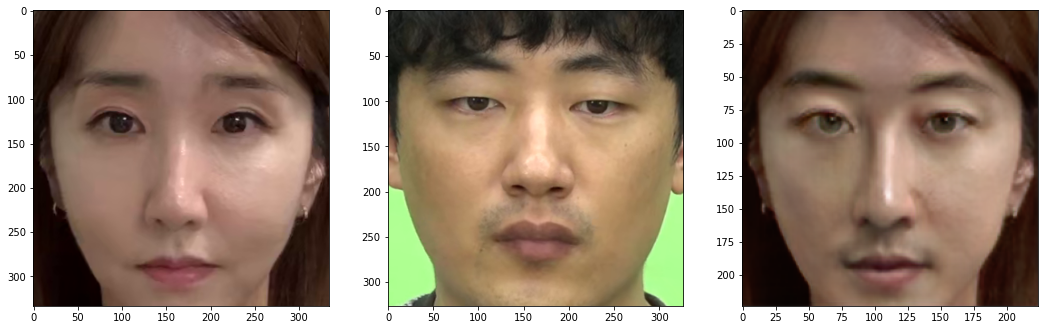

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(tgt)
ax[1].imshow(src)
ax[2].imshow(result_face)

In [51]:
inp_src = tf.convert_to_tensor(model.preprocess_input(tgt)[None, ...], dtype=tf.float32)
inp_tar = tf.convert_to_tensor(model.preprocess_input(src)[None, ...], dtype=tf.float32)
inp_segm = tf.convert_to_tensor(model.preprocess_input(mask.astype(np.uint8))[None, ...], dtype=tf.float32)

[conv4, inp_ds2, inp_ds4, inp_segm_mask] = model.encoder([inp_src, inp_tar, inp_segm])

In [58]:
from keras import backend as K

with K.get_session() as sess:
    conv4 = sess.run(conv4)
    inp_ds2 = sess.run(inp_ds2)
    inp_ds4 = sess.run(inp_ds4)
    inp_segm_mask = sess.run(inp_segm_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


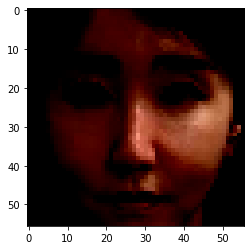

In [64]:
plt.imshow(inp_ds4[0])

In [36]:
model.decoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 512)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          131328      input_16[0][0]                   
__________________________________________________________________________________________________
instance_normalization_5 (Insta (None, 256)          2           dense_1[0][0]                    
__________________________________________________________________________________________________
activation_169 (Activation)     (None, 256)          0           instance_normalization_5[0][0]   
__________________________________________________________________________________________________
dense_2 (D